## Lab | Imbalanced data


We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset and explore the variables.

In [5]:
churnData = pd.read_csv('/Users/annakharchenkova/Desktop/Data Sc/Day 15/data_3.09_activities/files_for_activities/csv_files/customer_churn.csv')
churnData

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. Predict variable Churn  on variables tenure, SeniorCitizen, MonthlyCharges. Extract the target variable.

In [19]:
data = churnData[['tenure','SeniorCitizen', 'MonthlyCharges', 'Churn']]
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [20]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### 3. Extract the target variable.

In [21]:
y = data['Churn']

### 4. Extract the independent variables and scale them.

In [22]:
X = data.drop(['Churn'], axis = 1)

In [35]:
X.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [34]:
print(X.isna().sum())

tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64


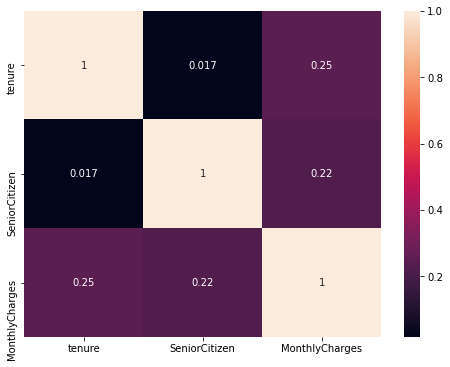

In [33]:
#numerical data correlations
corr_matrix=X.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [32]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

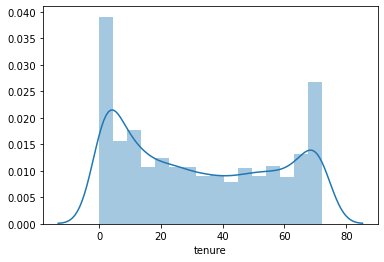

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


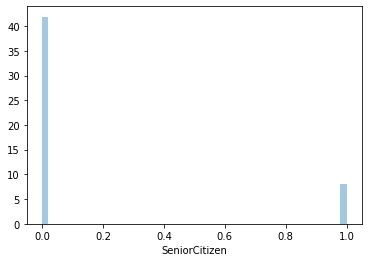

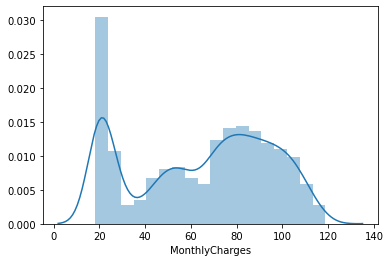

In [36]:
cols_num = X.columns

for col in cols_num:
    sns.distplot(X[col])
    plt.show()

#### 4.1. Scaling the variables

In [37]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)
x_standarized = transformer.transform(X)
x_standarized = pd.DataFrame(x_standarized)
X = x_standarized

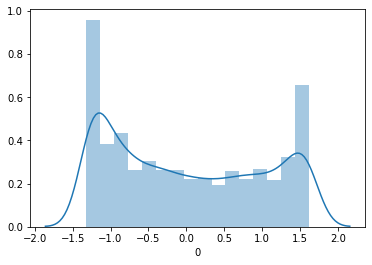

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


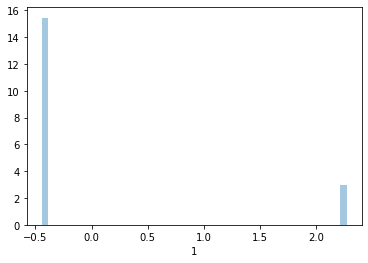

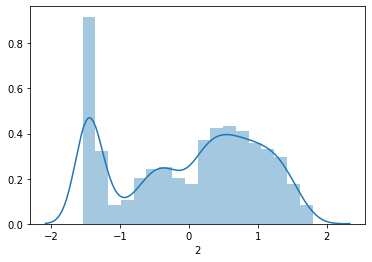

In [38]:
cols_num = x_standarized.columns

for col in cols_num:
    sns.distplot(x_standarized[col])
    plt.show()

### 5. Build the logistic regression model.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)

In [45]:
#training the model for logistic regression 
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0,  solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)
#max_iter = 1000,

In [46]:
from sklearn.metrics import accuracy_score
predictions = classification.predict(X_test)

In [47]:
predictions

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

### 6. Evaluate the model.

The accuracy of the model on test set is: 0.80 


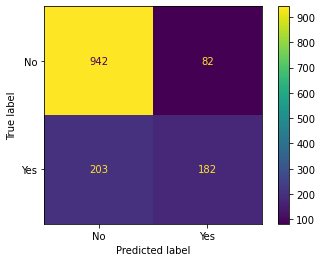

In [48]:
#check how many matches between prediction and actual results 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [49]:
from sklearn.metrics import cohen_kappa_score
print (cohen_kappa_score(y_test, predictions))

0.43533883325997913


In [50]:
y.value_counts()
#Very unbalanced data 

No     5174
Yes    1869
Name: Churn, dtype: int64

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) 
is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)

In [53]:
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=19698)

In [55]:
#training the model for logistic regression 
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0,  solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)
#max_iter = 1000,

In [56]:
from sklearn.metrics import accuracy_score
predictions = classification.predict(X_test)

The accuracy of the model on test set is: 0.74 


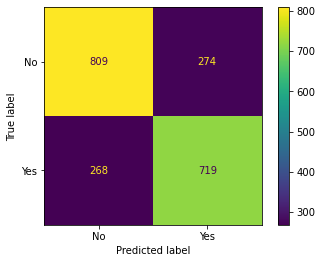

In [57]:
#check how many matches between prediction and actual results 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [58]:
from sklearn.metrics import cohen_kappa_score
print (cohen_kappa_score(y_test, predictions))

0.4753411166572673


Accuracy dropped, kappa improved, but not dramatically 

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels = ['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.72      0.73      0.73       987
          No       0.75      0.75      0.75      1083

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



### 8. Tomek links 
are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement

In [61]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [64]:
y_tl.value_counts()

No     4694
Yes    1869
Name: Churn, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=19698)

In [71]:
#training the model for logistic regression 
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0,  solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)
#max_iter = 1000,

In [72]:
from sklearn.metrics import accuracy_score
predictions = classification.predict(X_test)

The accuracy of the model on test set is: 0.80 


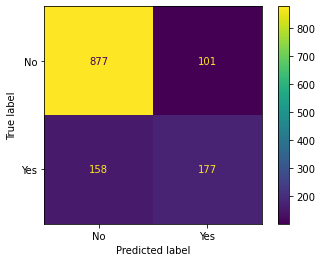

In [73]:
#check how many matches between prediction and actual results 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [74]:
from sklearn.metrics import cohen_kappa_score
print (cohen_kappa_score(y_test, predictions))

0.45027149621166196


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels = ['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.64      0.53      0.58       335
          No       0.85      0.90      0.87       978

    accuracy                           0.80      1313
   macro avg       0.74      0.71      0.72      1313
weighted avg       0.79      0.80      0.80      1313



Data still disbalanced